In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [7]:
def read_data(scenario, impact_category):
    # Import the MC datasets

    cwd = os.getcwd()
    folder_path = os.path.join(cwd, '..\\')
    raw_data = pd.read_excel(os.path.join(folder_path, f'{scenario}_MC.xlsx'), 'Impact Assessment', header=1, usecols=lambda x: 'Unnamed' not in x,)

    data = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 10:].astype('float')
    mean = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 3].astype('float')
    median = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 7].astype('float')
    stdev = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 4].astype('float')
    p5 = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 8].astype('float')
    p95 = raw_data[raw_data['Impact category'] == impact_category].iloc[0, 9].astype('float')

    return data, mean, median, stdev, p5, p95

In [11]:
Baseline_data, Baseline_mean, Baseline_median, Baseline_stdev, Baseline_p5, Baseline_p95 = read_data('Baseline', 'Climate change')
# Baseline_LFP_data, Baseline_LFP_mean, Baseline_LFP_median, Baseline_LFP_stdev, Baseline_LFP_p5, Baseline_LFP_p95 = read_data('Baseline_LFP', 'Climate change')
# CuFe_data, CuFe_mean, CuFe_median, CuFe_stdev, CuFe_p5, CuFe_p95 = read_data('CuFe', 'Climate change')
# CuFe_LFP_data, CuFe_LFP_mean, CuFe_LFP_median, CuFe_LFP_stdev, CuFe_LFP_p5, CuFe_LFP_p95 = read_data('CuFe_LFP', 'Climate change')

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


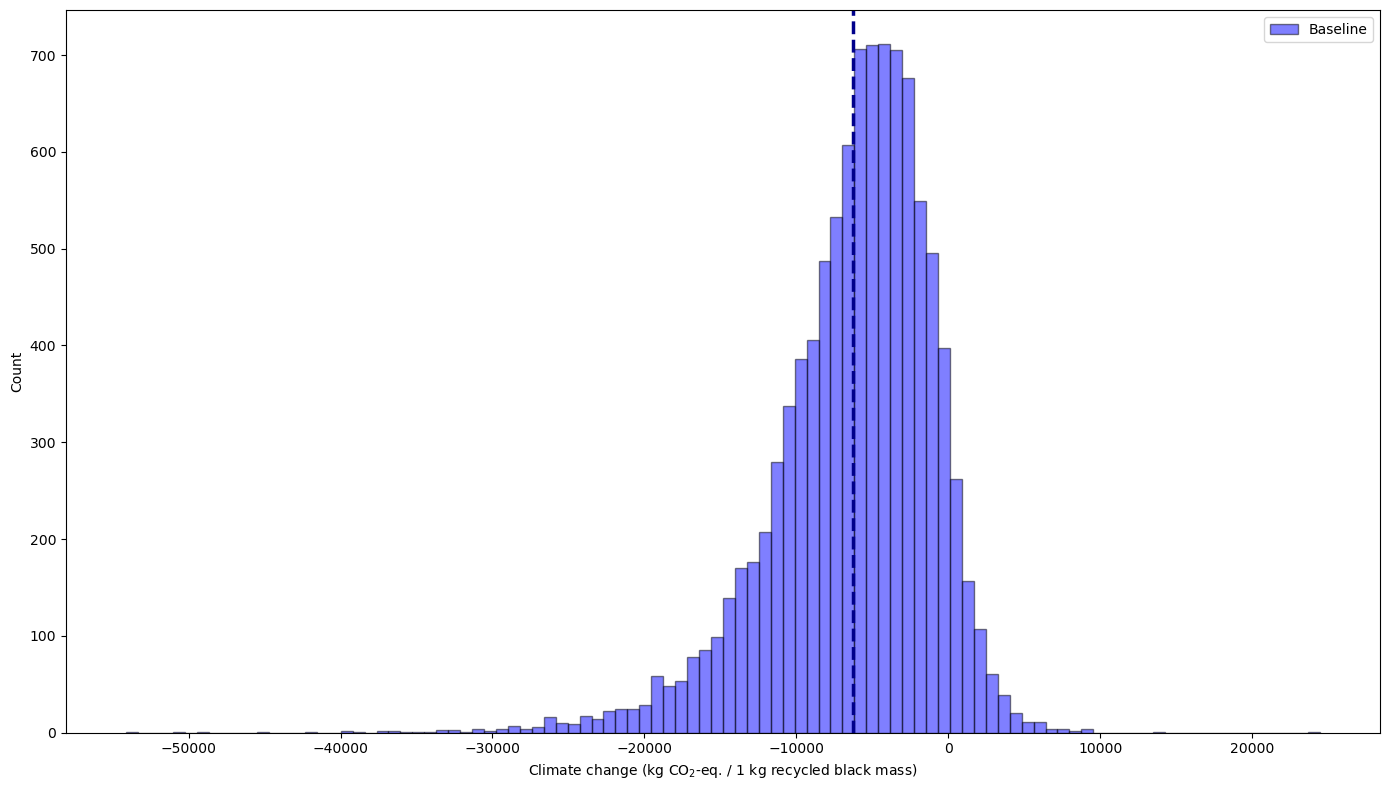

In [13]:
# Plot the data

fig, ax = plt.subplots(figsize=(14, 8))

ax.hist(Baseline_data.values, bins=100, alpha=0.5, label='Baseline', color='blue', edgecolor='k')

plt.axvline(Baseline_mean, color='darkblue', linestyle='dashed', linewidth=2.5)

plt.xlabel('Climate change (kg CO$_2$-eq. / 1 kg recycled black mass)')
plt.ylabel('Count')

ax.legend()
plt.tight_layout()
plt.show()